# Декораторы

**Декоратор** — структурный шаблон проектирования, предназначенный для динамического подключения дополнительного поведения к объекту. Шаблон Декоратор предоставляет гибкую альтернативу практике создания подклассов с целью расширения функциональности.

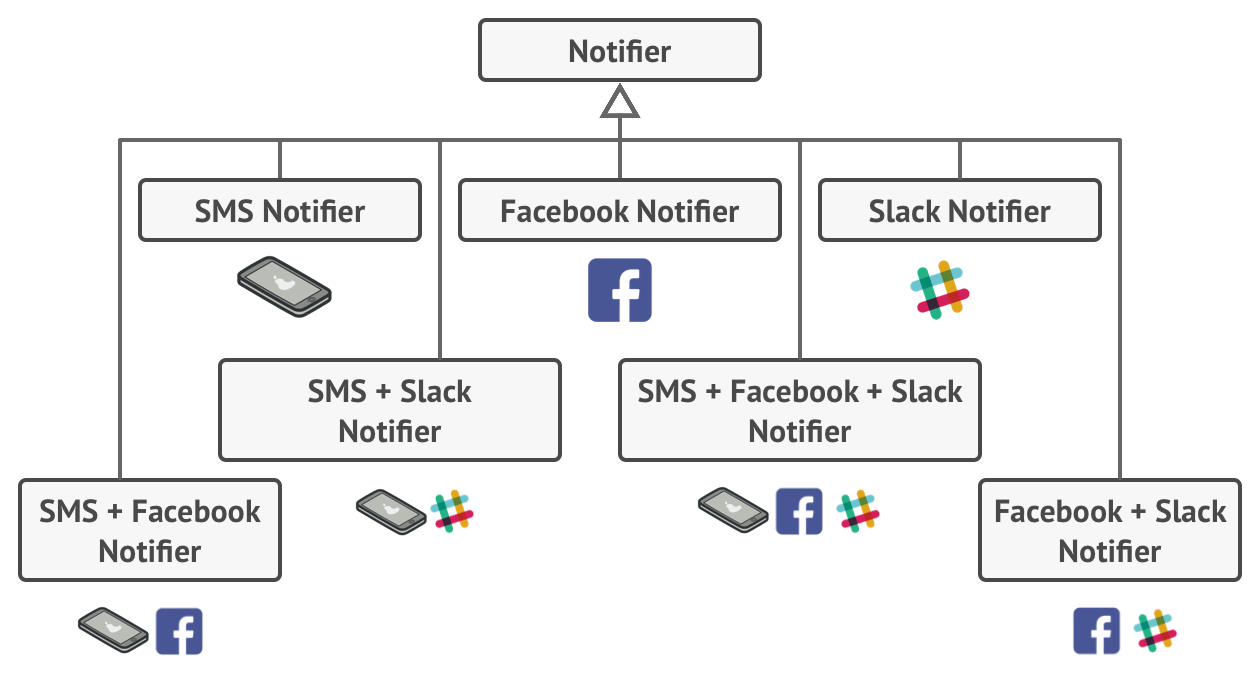

Python предусматривает такой же механизм для функций:

In [1]:
class A:
    @staticmethod
    def p():
        print("Привет, я в декораторе")

In [2]:
A.p()

Привет, я в декораторе


## Несколько фактов о функциях

В этом блокноте используются идеи, описанные в статьях:
- https://habr.com/ru/post/141411/
- https://habr.com/ru/post/141501/

### 1. Функции - это объекты

В первую очередь надо помнить о том, что в питоне всё - даже функции - является объектами.

In [3]:
def p1(s="привет"):
    return s.upper()
 
print(p1())

ПРИВЕТ


Создадим еще одну переменную, которая будет ссылаться на ту же функцию:

In [4]:
p2 = p1
 
print(p2())

ПРИВЕТ


При этом если мы удалим первую переменную-ссылку на эту функцию, то сама функция из памяти не удалится, и вторая переменная продолжит ссылаться на нее:

In [5]:
del p1
p1()

NameError: name 'p1' is not defined

In [6]:
p2()

'ПРИВЕТ'

### 2. Функции можно определять внутри других функций

In [7]:
def a():
    def b():
        print("Функция b")
    
    print("Функция a")
    b()

a()

Функция a
Функция b


Но стоит помнить об области видимости функции b:

In [8]:
b()

NameError: name 'b' is not defined

### 3. Функции могут возвращать функции

как и любой другой объект

In [9]:
def a():
    def b():
        print("Функция b")
    
    return b

a()

<function __main__.a.<locals>.b()>

In [10]:
c = a()
c()

Функция b


In [11]:
a()()

Функция b


### 4. Callbacks

Мы можем передавать функцию как аргумент в другую функцию. Например, чтобы выполнить ее по завершении какого-то кода. Это частая практика для асинхронных приложений, когда мы не знаем точно, когда закончит выполняться один блок кода и нам надо будет выполнить следующий код.

In [13]:
def a(callback):
    print("Сначала выполним код, написанный в функции a, а потом:")
    callback()
    
def b():
    print("код в функции b")

def c():
    print("код в функции c")
    
a(b)

Сначала выполним код, написанный в функции a, а потом:
код в функции b


In [14]:
a(c)

Сначала выполним код, написанный в функции a, а потом:
код в функции c


## Создание своего декоратора

В терминах функций в питоне **декоратор** - это "обертка" над декорируемой функцией. Т.е. это по сути новая функция, которая выполняет какой-то код до выполнения исходной функции, затем выполняет саму исходную функцию, и в конце выполняет еще какой-то код. Напишем свой простейший декоратор.

In [15]:
def decorator(source_func):
    # вот та самая функция, которая выполняет некоторый код до и после исходной функции
    def wrapper():
        print("Код ДО исходной функции")
        source_func()
        print("Код ПОСЛЕ исходной функции")
    
    # нам может понадобиться декорировать несколько разных функций, поэтому внешняя функция decorator возвращает
    # новую функцию, принимая в аргументах исходную
    return wrapper

Если мы хотим переопределить поведение какой-то функции, не внося в нее изменения, то мы просто должны присвоить переменной, ссылающейся на исходную функцию, ссылку на новую, обернутую, функцию.

In [16]:
def func():
    print("код ВНУТРИ исходной функции")
    
func()

код ВНУТРИ исходной функции


In [17]:
decorator(func)

<function __main__.decorator.<locals>.wrapper()>

In [18]:
decorator(func)()

Код ДО исходной функции
код ВНУТРИ исходной функции
Код ПОСЛЕ исходной функции


In [19]:
func = decorator(func)

func()

Код ДО исходной функции
код ВНУТРИ исходной функции
Код ПОСЛЕ исходной функции


А что если выполнить код `func = decorator(func)` еще раз?

In [20]:
func = decorator(func)

func()

Код ДО исходной функции
Код ДО исходной функции
код ВНУТРИ исходной функции
Код ПОСЛЕ исходной функции
Код ПОСЛЕ исходной функции


## Синтаксический сахар

Еще раз определим функцию `func` и обернем ее в декоратор _in a pythonic way_

In [21]:
@decorator
def func():
    print("код ВНУТРИ исходной функции")
    
func()

Код ДО исходной функции
код ВНУТРИ исходной функции
Код ПОСЛЕ исходной функции


Таким образом, запись в предыдущей ячейке эквивалентна следующему:

In [22]:
def func():
    print("код ВНУТРИ исходной функции")
    
func = decorator(func)

Кстати, в этом виде декоратор можно также применять несколько раз:

In [23]:
@decorator
@decorator
def func():
    print("код ВНУТРИ исходной функции")
    
func()

Код ДО исходной функции
Код ДО исходной функции
код ВНУТРИ исходной функции
Код ПОСЛЕ исходной функции
Код ПОСЛЕ исходной функции


Также мы можем обернуть функцию в несколько декораторов. Порядок оборачивания - важен.

In [24]:
def decorator1(func):
    def wrapper():
        print("Декоратор 1 - начало")
        func()
        print("Декоратор 1 - конец")
    return wrapper


def decorator2(func):
    def wrapper():
        print("Декоратор 2 - начало")
        func()
        print("Декоратор 2 - конец")
    return wrapper

In [25]:
@decorator1
@decorator2
def f():
    print("Функция")
    
f()

Декоратор 1 - начало
Декоратор 2 - начало
Функция
Декоратор 2 - конец
Декоратор 1 - конец


In [26]:
@decorator2
@decorator1
def f():
    print("Функция")
    
f()

Декоратор 2 - начало
Декоратор 1 - начало
Функция
Декоратор 1 - конец
Декоратор 2 - конец


## Зачем нужны декораторы, если и так можно из одной функции вызывать другие?

Рассмотрим пример из проекта Django - фреймворка для быстрого и удобного создания серверных приложений.

Допустим, у нас на сервере есть несколько адресов, доступ к которым должен быть открыт только зарегистрированным пользователям. Механизм регистрации и авторизации пользователей реализован где-то в недрах джанги, мы его не должны трогать. Поэтому для того, чтобы перед исполнением функции проверить, зарегистрирован ли пользователь, Django предоставляет нам декоратор: https://docs.djangoproject.com/en/3.0/topics/auth/default/#the-login-required-decorator

In [ ]:
from django.contrib.auth.decorators import login_required

@login_required
def my_view(request):
    pass

## Задание:

Написать декоратор `time_decorator`, который после выполнения функции выводит на экран время в секундах, которое было затрачено на выполнение. При этом нужно учесть вариант, когда оборачиваемая функция возвращает какое-то значение. Например, для функции:


```@time_decorator
def sleep_2_sec():
    time.sleep(2)
    print("sleep_2_sec")```


должно быть выведено:

```sleep_2_sec
2```

In [ ]:
# ваше решение



# Проброс аргументов в декорируемую функцию

Ведь какой смысл в функциях без аргументов?

Допустим, мы хотим обернуть функцию, которая принимает 2 аргумента:

In [29]:
def func_with_2_args(name, last_name):
    print("Здесь начинает выполоняться функция")
    print("Имя:", name)
    print("Фамилия:", last_name)
    
func_with_2_args("Евпатий", "Коловрат")

Здесь начинает выполоняться функция
Имя: Евпатий
Фамилия: Коловрат


Тогда нам нужно создать такую функцию-обертку, которая тоже будет принимать 2 аргумента, чтобы не поломать интерфейс взаимодействия с исходной функцией.

In [30]:
def decorator_with_2_args(func):
    def wrapper_with_2_args(arg1, arg2):
        print("Аргументы, которые получил декоратор:", ", ".join((arg1, arg2)))
        func(arg1, arg2)
    return wrapper_with_2_args

@decorator_with_2_args
def func_with_2_args(name, last_name):
    print("Здесь начинает выполоняться функция")
    print("Имя:", name)
    print("Фамилия:", last_name)

func_with_2_args("Евпатий", "Коловрат")

Аргументы, которые получил декоратор: Евпатий, Коловрат
Здесь начинает выполоняться функция
Имя: Евпатий
Фамилия: Коловрат


### Декорирование методов

Теперь, когда мы научились пробрасывать аргументы в функцию, мы можем оборачивать и методы классов. Ведь единственное, что отличает метод класса от обычной функции - это то, что при его вызове первым аргументом передается `self`

In [31]:
def method_decorator(method):
    def method_wrapper(self, x):
        return method(self, x * 1.15) # возьмем комиссию за операцию
    return method_wrapper


class Price:
    def __init__(self, price):
        self.price = price            # назначим цену
        
    @method_decorator
    def get_price(self, exchange_rate):
        return self.price * exchange_rate   # вернем цену в другой валюте. А в декораторе мы описали комиссию за операцию =)
    
p = Price(100)
p.get_price(72)

8280.0

### Общий вид декораторов с аргументами

Конечно, мы хотим применять декораторы к разным функциям, которые принимают разное количество аргументов. Для этого можем воспользоваться `*args, **kwargs`

In [33]:
def common_decorator(func):
    def common_wrapper(*args, **kwargs):
        print("Декоратор принял args:", args)
        print("Декоратор принял kwargs:", kwargs)
        result = func(*args, **kwargs)
        print("Декоратор завершается\n")
        return result
    return common_wrapper

@common_decorator
def zero_args():
    print("Функция без аргументов")
    
@common_decorator
def one_arg(x):
    print("Функция с одним аргументом х =", x)
    
@common_decorator
def two_args(x, y):
    print("Функция с двумя аргументами x, y =", x, y)
    
@common_decorator
def multiple_args(*args):
    print("Функция, которая приняла args:", args)
    
@common_decorator
def any_arg(*args, **kwargs):
    print("Функция, которая приняла args:", args, "и kwargs:", kwargs)
    
    
zero_args()
one_arg(x=25)
two_args("ПРИВЕТ", "АРГУМЕНТ")
multiple_args(1, 2, 3, 4, 5)
any_arg(1, 2, 3, 4, a="A", b="B", e=2.71)

Декоратор принял args: ()
Декоратор принял kwargs: {}
Функция без аргументов
Декоратор завершается

Декоратор принял args: ()
Декоратор принял kwargs: {'x': 25}
Функция с одним аргументом х = 25
Декоратор завершается

Декоратор принял args: ('ПРИВЕТ', 'АРГУМЕНТ')
Декоратор принял kwargs: {}
Функция с двумя аргументами x, y = ПРИВЕТ АРГУМЕНТ
Декоратор завершается

Декоратор принял args: (1, 2, 3, 4, 5)
Декоратор принял kwargs: {}
Функция, которая приняла args: (1, 2, 3, 4, 5)
Декоратор завершается

Декоратор принял args: (1, 2, 3, 4)
Декоратор принял kwargs: {'a': 'A', 'b': 'B', 'e': 2.71}
Функция, которая приняла args: (1, 2, 3, 4) и kwargs: {'a': 'A', 'b': 'B', 'e': 2.71}
Декоратор завершается



## Фабрика декораторов

А что если нужно оборачивать функцию по-разному в зависимости от каких-то внешних условий? Например, задание URL-адресов в фреймворке flask реализовано так: https://flask.palletsprojects.com/en/1.1.x/quickstart/

In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

Давайте еще раз зафиксируем то, что синтаксис

`@decorator`

просто вызывает функцию `decorator` и присваивает результат выполнения в переменную. А давайте сейчас создадим обертку над декоратором!

In [34]:
def decorator_maker():
    print("decorator_maker started")
    def decorator(func):
        print("decorator started")
        def wrapper():
            print("wrapper started")
            func()
            print("wrapper ended")
        print("decorator returns wrapper")
        return wrapper
    print("decorator_maker returns decorator")
    return decorator

def usual_func():
    print("usual function")

Запустим всё это по частям

In [35]:
new_decorator = decorator_maker()

decorator_maker started
decorator_maker returns decorator


In [36]:
new_decorator

<function __main__.decorator_maker.<locals>.decorator(func)>

In [37]:
usual_func = new_decorator(usual_func)

decorator started
decorator returns wrapper


In [38]:
usual_func()

wrapper started
usual function
wrapper ended


А теперь запишем то же самое через @:

In [39]:
@decorator_maker()       # вызвали функцию decorator_maker и применили @ уже к возвращенному ей декоратору
def usual_func():
    print("usual function")

decorator_maker started
decorator_maker returns decorator
decorator started
decorator returns wrapper


In [40]:
usual_func()

wrapper started
usual function
wrapper ended


### А теперь добавим аргументы в получившуюся конструкцию

In [41]:
def decorator_maker(dec_arg_1, dec_arg_2):
    print("Inside decorator_maker. Decorator args:", dec_arg_1, dec_arg_2)
    def decorator(func):
        print("Inside decorator. Decorator args:", dec_arg_1, dec_arg_2)
        def wrapper(func_arg_1, func_arg_2):
            print("Inside wrapper. Decorator args:", dec_arg_1, dec_arg_2)
            print("Inside wrapper. Function args:", func_arg_1, func_arg_2)
        return wrapper
    return decorator

In [42]:
@decorator_maker("DEC_ARG_1", "DEC_ARG_2")
def func(s1, s2):
    print("Inside function. Function args:", s1, s2)

Inside decorator_maker. Decorator args: DEC_ARG_1 DEC_ARG_2
Inside decorator. Decorator args: DEC_ARG_1 DEC_ARG_2


In [43]:
func("FUNC_ARG_1", "FUNC_ARG_2")

Inside wrapper. Decorator args: DEC_ARG_1 DEC_ARG_2
Inside wrapper. Function args: FUNC_ARG_1 FUNC_ARG_2


## Поле `__name__` и библиотка functools

У каждого объекта-фукнции мы можем получить строковое представление ее имени через поле `__name__`

In [44]:
def our_function():
    pass

our_function.__name__

'our_function'

А меняет ли это свойство декоратор?

In [45]:
@decorator
def decorated_function():
    pass

decorated_function.__name__

'wrapper'

### functools

В питоне есть библиотека functools, в которой реализованы некоторые функции для работы с вызываемыми объектами. Например, в ней есть реализация декоратора, который задает аргументы по умолчанию для функции:

In [46]:
from functools import partial

print(int('10010'))
print(int('10010', base=2), end='\n\n')

basetwo = partial(int, base=2)
basetwo.__doc__ = 'Convert base 2 string to an int.'
print(basetwo('10010'))

10010
18

18


Или, например, в Python 3.8 есть декоратор `@cached_property`, который позволяет не тратить ресурсы на пересчет property каждый раз при вызове, а сохраняет значение после первого вычисления. https://docs.python.org/3.8/library/functools.html

In [47]:
from functools import cached_property
import statistics


class DataSet:
    def __init__(self, sequence_of_numbers):
        self._data = sequence_of_numbers

    @cached_property
    def stdev(self):
        return statistics.stdev(self._data)

    @cached_property
    def variance(self):
        return statistics.variance(self._data)
    
    
ds = DataSet([1, 2, 3, 4, 5])
ds.variance

2.5

In [49]:
ds.stdev

1.5811388300841898

### functools.wraps

Но тем не менее мы обратились к этой библиотеке для того, чтобы сохранять исходные имена оборачиваемых функций. Посмотрим, как это делается.

In [50]:
from functools import wraps


def my_decorator(f):
    @wraps(f)
    def wrapper(*args, **kwds):
        print('Calling decorated function')
        return f(*args, **kwds)
    return wrapper


@my_decorator
def example():
    """Docstring"""
    print('Called example function')
    
example()

Calling decorated function
Called example function


In [51]:
example.__name__

'example'

# Альтернативное применение декораторов

Поскольку декораторы - это просто синтаксический сахар, который вызывает функции, можно придумать менее стандартное поведение для вызываемых функций.

## Регистрация функций / событий

Например, нам нужно вызвать целый ряд функций, когда происходит какое-то событие. Для этого их надо где-то хранить и динамически добавлять при создании. Для этого можно использовать декораторы. (https://medium.com/better-programming/decorators-in-python-72a1d578eac4)

In [52]:
PLUGINS = dict()

# это наш декоратор, в котором мы регистрируем функцию
def register(func):
    PLUGINS[func.__name__] = func
    return func

@register
def add(a, b):
    return a+b

@register
def multiply(a, b):
    return a*b

def operation(func_name, a, b):
    func = PLUGINS[func_name]
    return func(a, b)

print(PLUGINS)
print(operation('add', 2, 3))
print(operation('multiply', 2, 3))

{'add': <function add at 0x7fc2f8071550>, 'multiply': <function multiply at 0x7fc2f80714c0>}
5
6


## Обертки над классами

В питоновском классе есть два метода, которые совершают вызов объекта: `__init__()` и `__call__()`. Обернув класс в декоратор, мы можем поколдовать над этими методами.

In [54]:
@common_decorator
class Calculator:

    def __init__(self, num):
        self.num = num
        import time
        time.sleep(2)
        
    def __call__(self):
        print("call")

    def doubled_and_add(self):
        res = sum([i * 2 for i in range(self.num)])
        print("Result : {}".format(res))

In [55]:
c = Calculator(100)

Декоратор принял args: (100,)
Декоратор принял kwargs: {}
Декоратор завершается



In [56]:
c.doubled_and_add()

Result : 9900


In [57]:
c()

call


In [58]:
common_decorator(c)()

Декоратор принял args: ()
Декоратор принял kwargs: {}
call
Декоратор завершается



## Задание

В этом задании требуется написать фабрику декораторов, которые будут логировать вызовы функций. Чтобы не усложнять, в качестве журнала событий будем использовать списки. Требования к фабрике:

- фабрика должна называться `logging_decorator`
- при создании декоратора фабрика должна принять требуемый список-логгер в аргументах
- обернутая функция должна возвращать тот же результат, который бы вернула оборачиваемая функция
- при вызове обернутой функции в список-логгер должен добавляться словарь, в котором будут храниться название функции, список поданных аргументов, время вызова функции и результат, который она вернула. Формат словаря должен быть таким:


    {
        'name': 'test_function',
        'arguments': {'a': 1, 'b': 2},
        'call_time': datetime.datetime(2021, 8, 1, 18, 18, 7, 849184),
        'result': 127
    }

Ниже приведен пример использования такого декоратора.

#### Пример использования декоратора

    logger = []  # этот словарь будет хранить наш "лог"

    @logging_decorator(logger)  # в аргументы фабрики декораторов подается логгер
    def test_simple(a, b=2):
        return 127

    test_simple(1)  # при вызове функции в список logger должен добавиться словарь с
                    # информацией о вызове функции

    print(logger)

> `[{'name': 'test_simple', 'arguments': {'a': 1, 'b': 2}, 'call_time': datetime.datetime(2021, 8, 1, 18, 18, 7, 849184), 'result': 127}]`

In [ ]:
# код тут

